In [71]:
import pandas as pd
df = pd.read_csv("Data/100kTweetsCleaned.csv")
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-11-08 23:59:59+00:00,1590132054296956928,What a waste of free air. Stop with the bul...,Sparky28292
1,1,2022-11-08 23:59:52+00:00,1590132025444696065,Sustainable Water and Energy Solutions support...,SustDev
2,2,2022-11-08 23:59:47+00:00,1590132002522816512,Coal and gas power equipment and factories n...,FreeMan71542585
3,3,2022-11-08 23:59:45+00:00,1590131996692721665,14 Someone needs to let these people know the ...,play101975
4,4,2022-11-08 23:59:45+00:00,1590131996323328001,"California, Arizona, and Nevada Democrats: You...",winewatcher
...,...,...,...,...,...
99996,99996,2022-11-05 20:31:42+00:00,1588992473270919168,You walked? Because you know GhG aND ClIM...,GHabs9
99997,99997,2022-11-05 20:31:40+00:00,1588992465314250752,"Protection Act in September, but of course the...",Loves_Equines
99998,99998,2022-11-05 20:31:26+00:00,1588992407479418880,Elon Musk u buying Twitter is actually a misp...,KilluaBoy4KT
99999,99999,2022-11-05 20:31:19+00:00,1588992375644639233,Wetenschappelijke verantwoording:\n\n/\n\nPe...,Z06Ronald


In [72]:
from nltk.tokenize import WordPunctTokenizer
tk = WordPunctTokenizer()

def tokenize_and_process(d):
    
    # running into issue with there being a float as d so if not type string drop
    if type(d) != str:
        df.drop(d)
    
    
    lower_case = d.lower()
    words = tk.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()


In [78]:
%%timeit
processed_tweets = []

for i in range(10):
    processed_tweets.append(tokenize_and_process(df.Text[i]))
    
    

148 µs ± 2.99 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [74]:
processed_tweets = []

for i in range(200):
    processed_tweets.append(tokenize_and_process(df.Text[i]))

KeyError: '[nan] not found in axis'

In [43]:
processed_tweets = []
print ('Processsing and tokenizing tweets')
for i in range(100000):
    if i % 5000 == 0:
        print("Tweets {} of {} have been processed".format(i, 100000))
    processed_tweets.append(tokenize_and_process(df.Text[i]))

Processsing and tokenizing tweets
Tweets 0 of 100000 have been processed


AttributeError: 'float' object has no attribute 'lower'

In [54]:
string = pd.Series(processed_tweets).str.cat(sep=' ')

In [55]:
string

'what waste free air stop with the bullshit climate change there such thing money laundering ploy plain and simple sustainable water and energy solutions supporting climate change and biodiversity objectives through innovation and clean technologies tomorrow cop27 event bluezone sdgpavilion register waterenergysolutions cop27 sdgpavilion coal and gas power equipment and factories needed produce his products and nobody the right denies climate change someone needs let these people know the climate changes everyday and also had ice age the earth has natural son warming and cooling need adapt the earths natural cycle not try and change stop strip mining the planet that will help lot more california arizona and nevada democrats you have the power save democracy save abortion rights social security medicare fight for climate change but you must vote your polling place our states are falling behind voterizer voteblue climate change 19217435 weather potato alkie more reason not buy that clima

In [75]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
custom_stopwords = ['climate', 'climate change', 'change', 'climatechange']
stopwords.update(custom_stopwords)

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'change',
 'climate',
 'climate change',
 'climatechange',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',

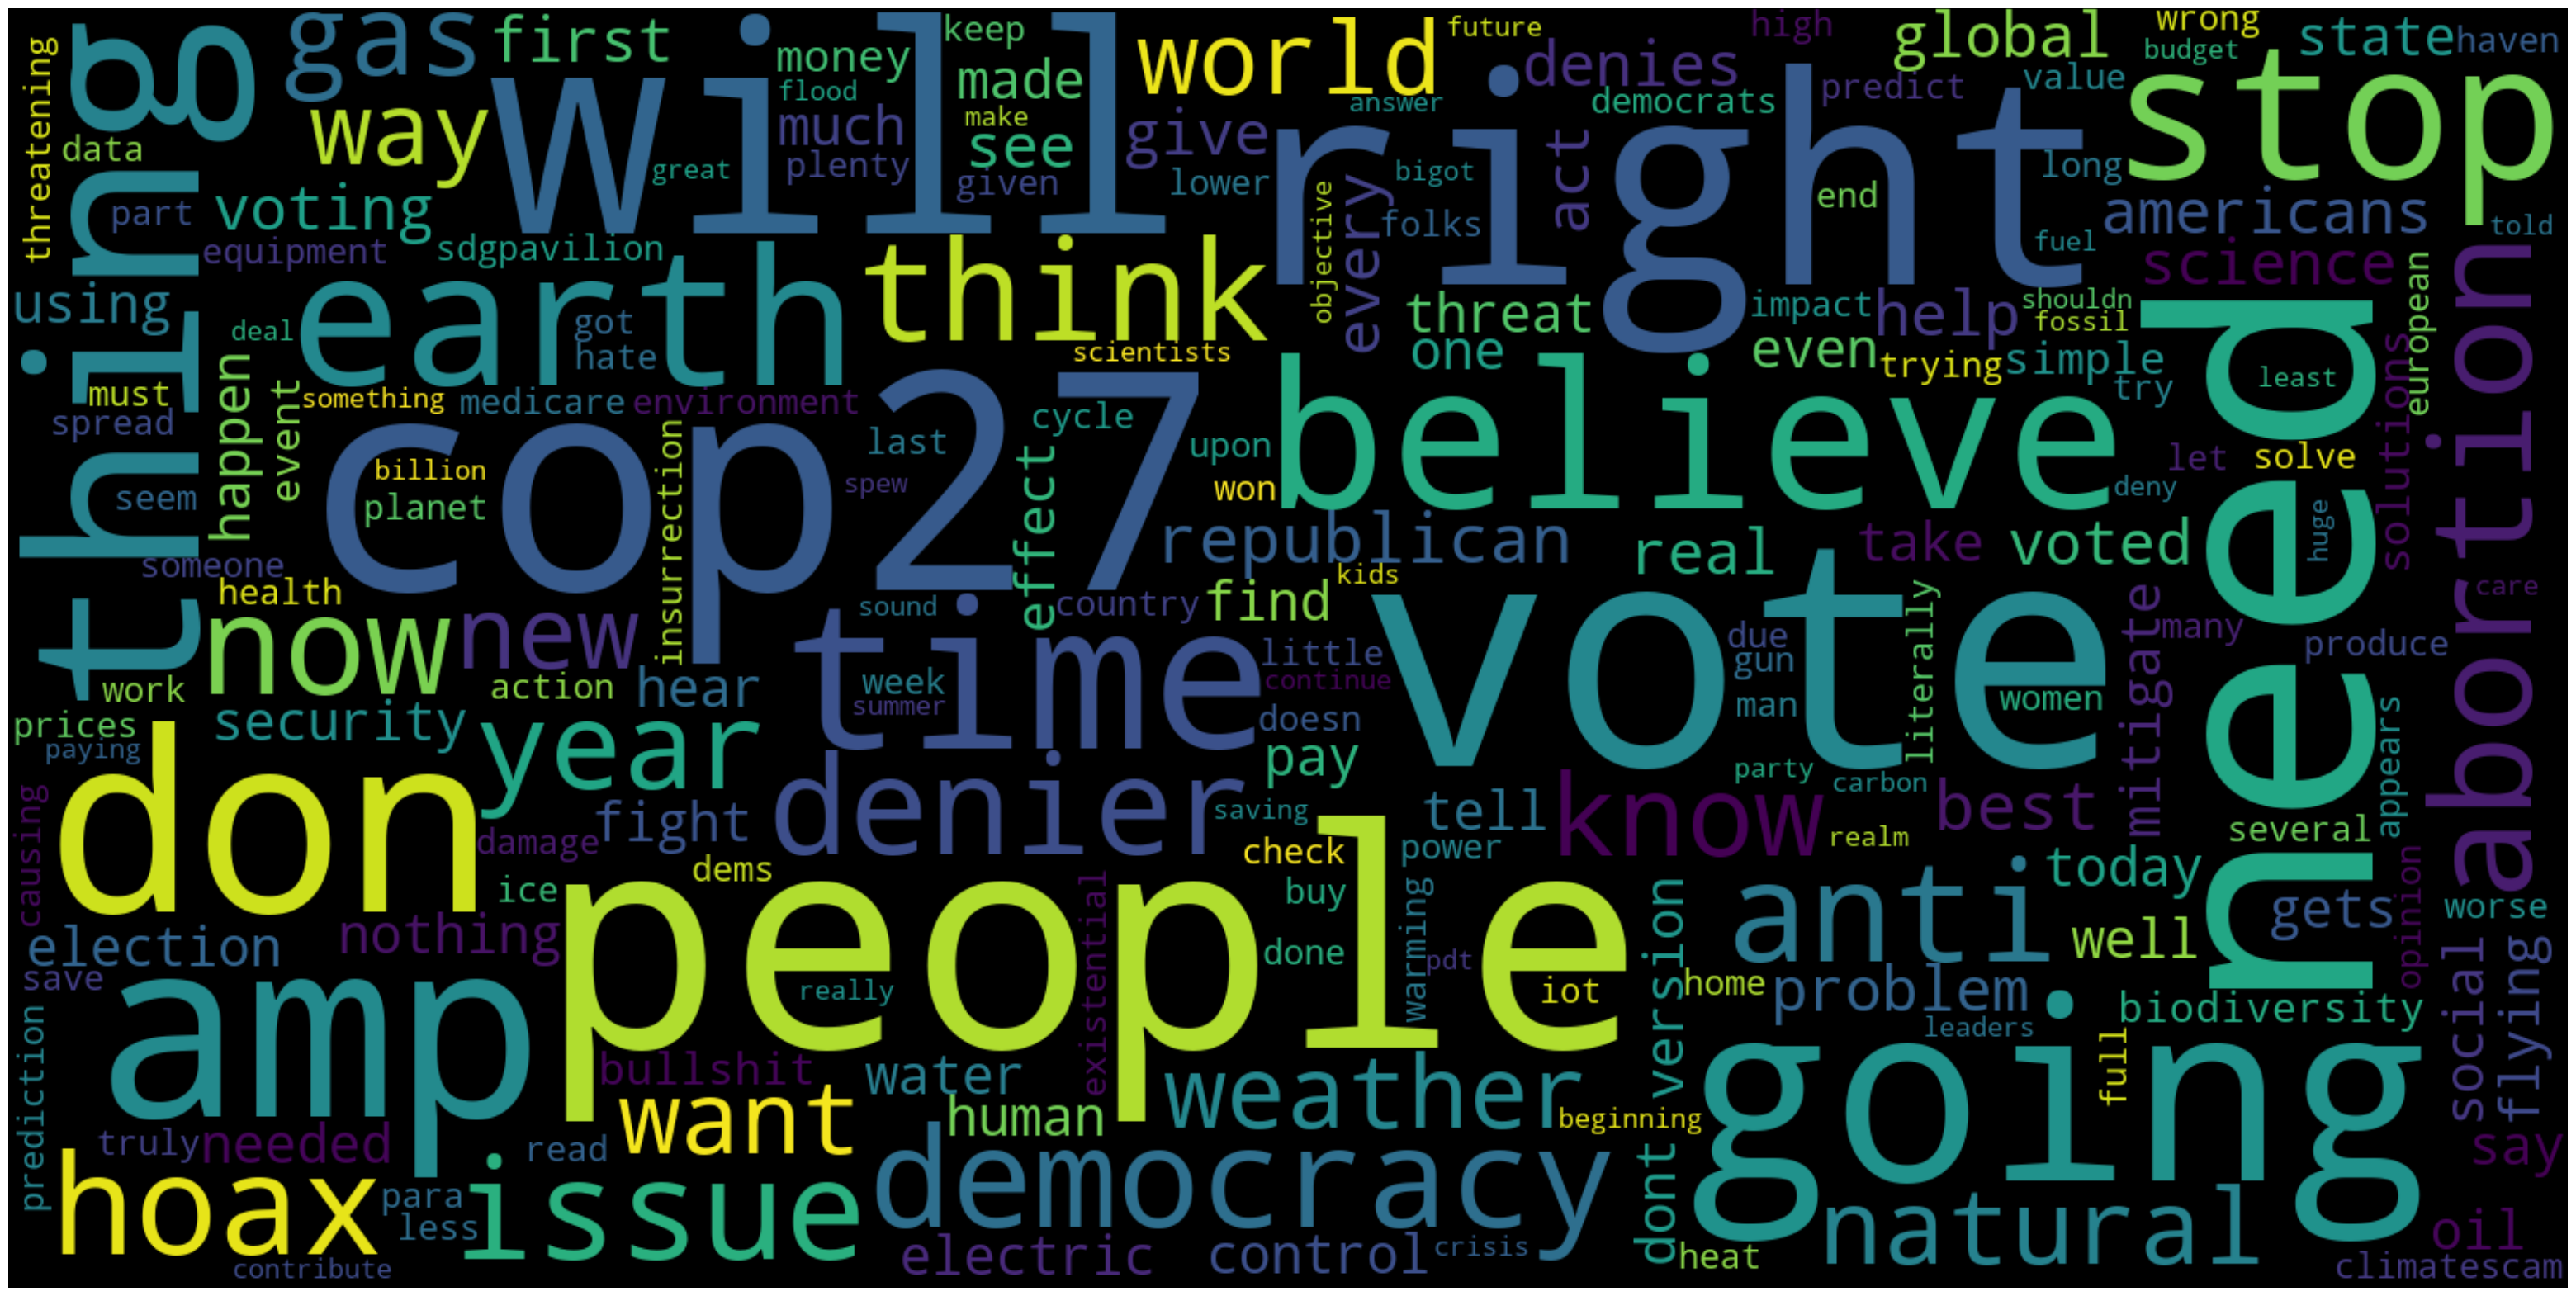

In [76]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=200,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()